In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers 

In [3]:
#Constants 
SEED = 123
IMAGE_SIZE = 256
BATCH_SIZE = 32
COLOR_CHANNEL = 3
EPOCHS = 15

In [4]:
#Load in the data set

dataset = tf.keras.utils.image_dataset_from_directory(
    "TomatoVillage",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16003 files belonging to 10 classes.


In [5]:
class_names  = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(32, 256, 256, 3)
[4 5 0 7 2 7 4 3 6 0 7 0 9 7 3 7 9 9 8 6 3 7 5 5 7 3 7 7 0 7 6 7]


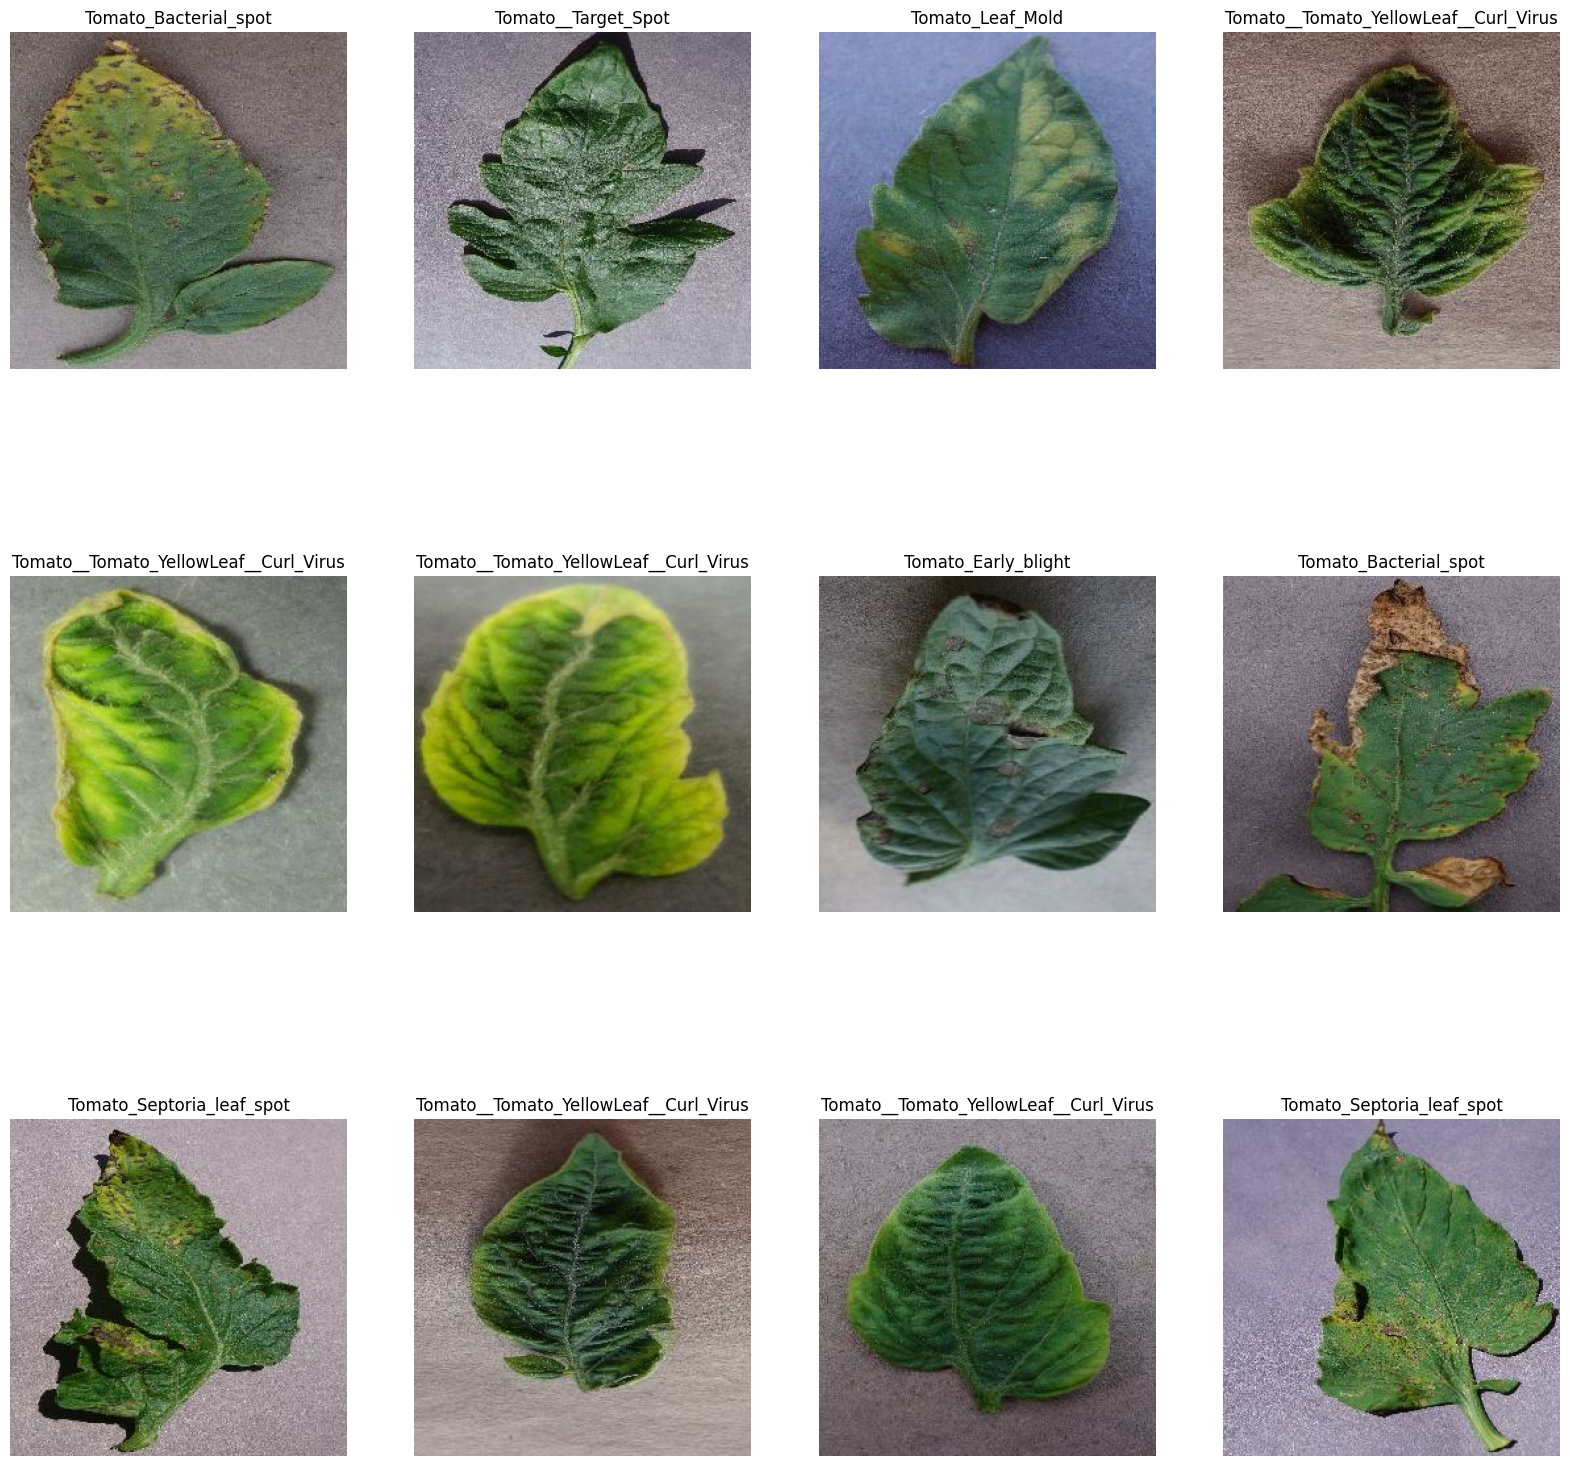

In [6]:
len(dataset) 

for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
#splitting data

def get_dataset_split(dataset, train_split = .75, val_split = .125, test_split = .125, shuffle = True, shuffle_size = 10000):
    
    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed= SEED)
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)

    return train_dataset, val_dataset, test_dataset

In [8]:
#setting up train, val and test dataset. 

train_dataset, val_dataset, test_dataset = get_dataset_split(dataset)

In [9]:
resize_and_rescale = tf.keras.layers.Cropping2D(
    cropping = (IMAGE_SIZE, IMAGE_SIZE)
)

resize_and_rescale = tf.keras.layers.Rescaling(
    scale = 1/225
)

#data augmentationca

data_augmentation = tf.keras.layers.RandomFlip(
    seed = SEED
)
data_augmentation = tf.keras.layers.RandomRotation(
    factor = 0.2,
    seed = SEED
)


In [10]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE, COLOR_CHANNEL)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (32, 256, 256, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [13]:
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_dataset
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.4006 - loss: 1.6754 - val_accuracy: 0.6061 - val_loss: 1.1409
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 681s 1s/step - accuracy: 0.6400 - loss: 1.0308 - val_accuracy: 0.5464 - val_loss: 1.8593
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.7583 - loss: 0.6897 - val_accuracy: 0.6305 - val_loss: 1.3383
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.8146 - loss: 0.5210 - val_accuracy: 0.7853 - val_loss: 0.6121
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.8465 - loss: 0.4373 - val_accuracy: 0.8019 - val_loss: 0.5668
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 707s 2s/step - accuracy: 0.8674 - loss: 0.3853 - val_accuracy: 0.8004 - val_loss: 0.6434
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.8893 - loss: 0.3145 - val_accuracy: 0.8770 - val_loss: 0.3507
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.8922 - loss: 0.3083 - val_accu

In [19]:
scores = model.evaluate(test_dataset)
scores

64/64 ━━━━━━━━━━━━━━━━━━━━ 127s 588ms/step - accuracy: 0.9209 - loss: 0.2245


[0.2245458960533142, 0.9208984375]

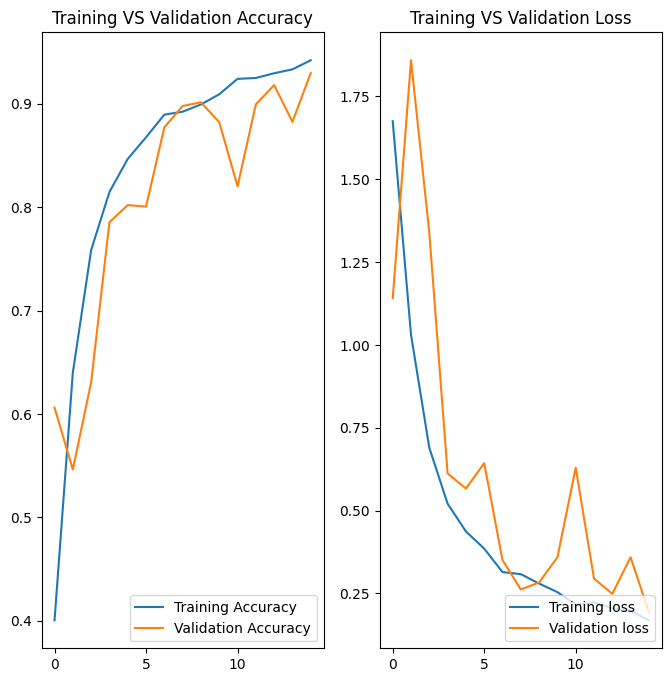

In [15]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training VS Validation Accuracy")


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = "Training loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation loss")
plt.legend(loc = "lower right")
plt.title("Training VS Validation Loss")
plt.show()

First image to predict
First image's actual label: Tomato_Septoria_leaf_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Tomato_Septoria_leaf_spot


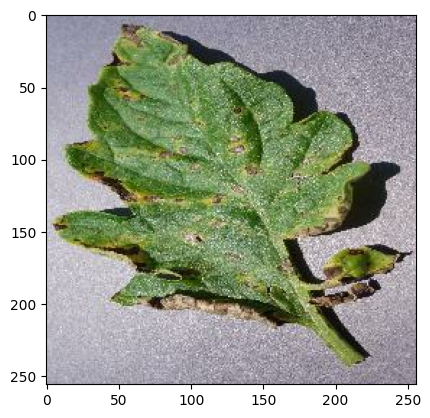

In [16]:
for image_batch, label_batch in test_dataset.take(1):

    first_image = image_batch[0].numpy().astype("uint8") #RGB of the first image
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)#all 32 prediction for this batch
    print(class_names[np.argmax(batch_prediction[0])])#prediction of the first batch

In [17]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


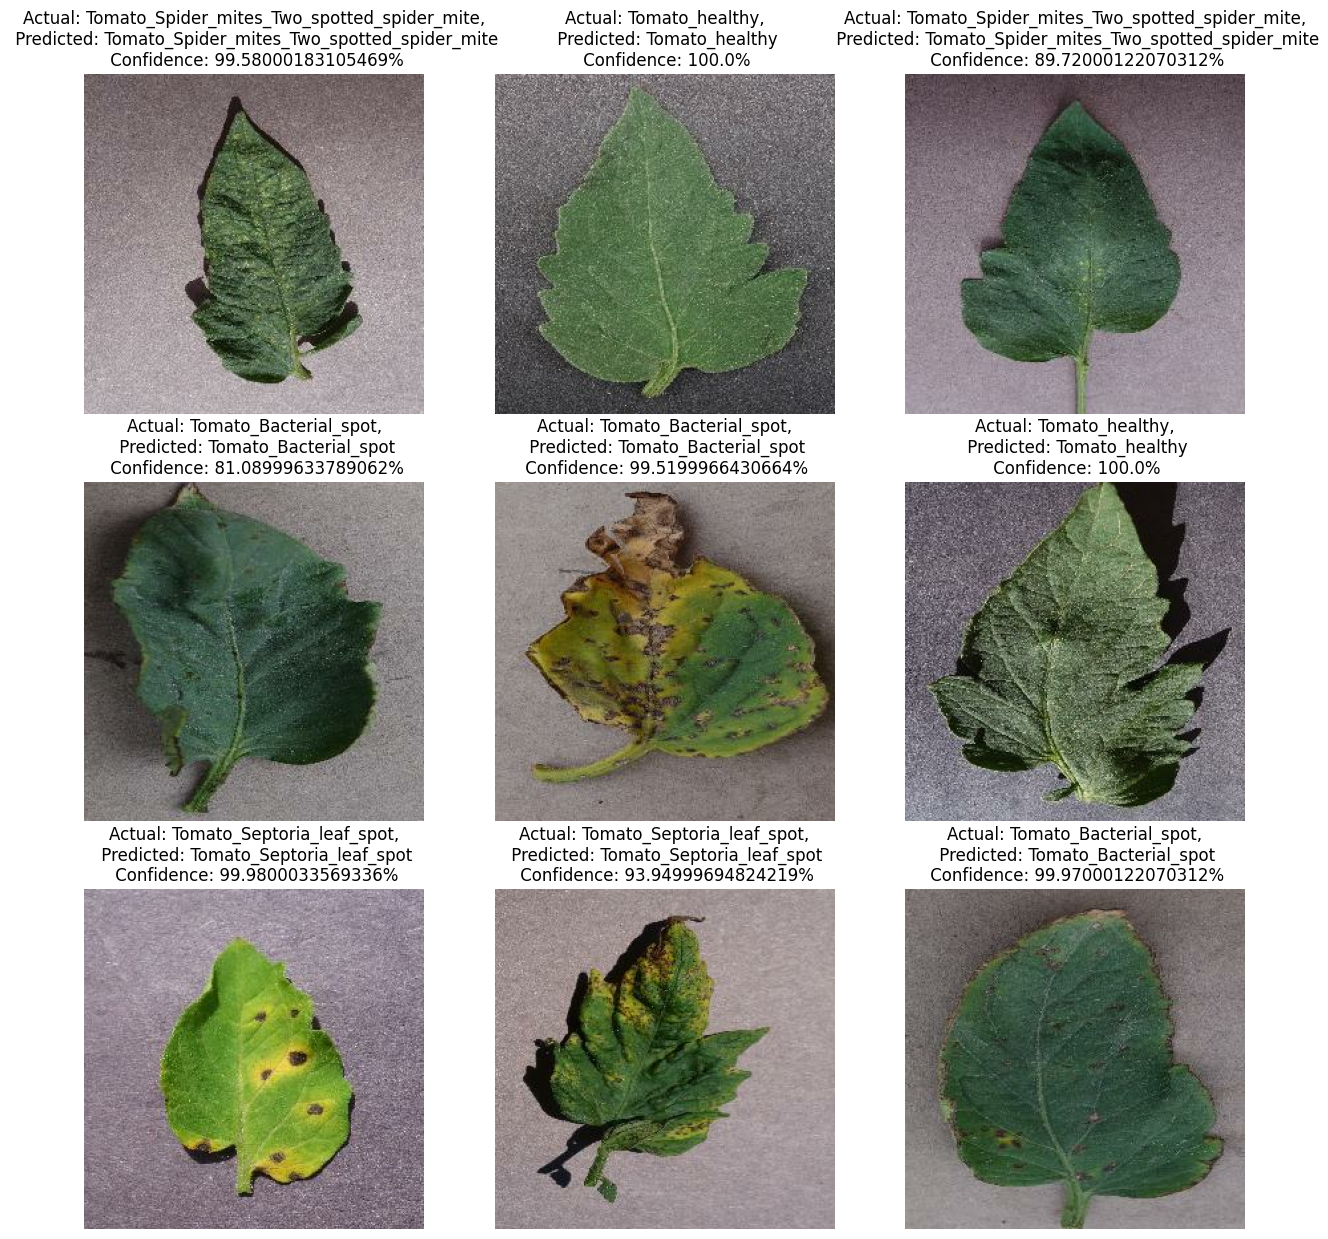

In [18]:
plt.figure(figsize=(15,15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}\n Confidence: {confidence}%")

        plt.axis("off")